<a href="https://colab.research.google.com/github/bugeki/DL/blob/main/DL_Assignment_1_(Classification_with_ANN_Churn_Prediction)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DL/ASS 1/Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum().any()

False

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [8]:
df = df.drop(["CustomerId",'Surname', 'Geography',"RowNumber"], axis = 1)

In [9]:
df.shape

(10000, 10)

In [10]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Female,43,2,125510.820,1,1,1,79084.100,0


In [11]:
df=pd.get_dummies(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Gender_Female    10000 non-null  uint8  
 10  Gender_Male      10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(2)
memory usage: 722.8 KB


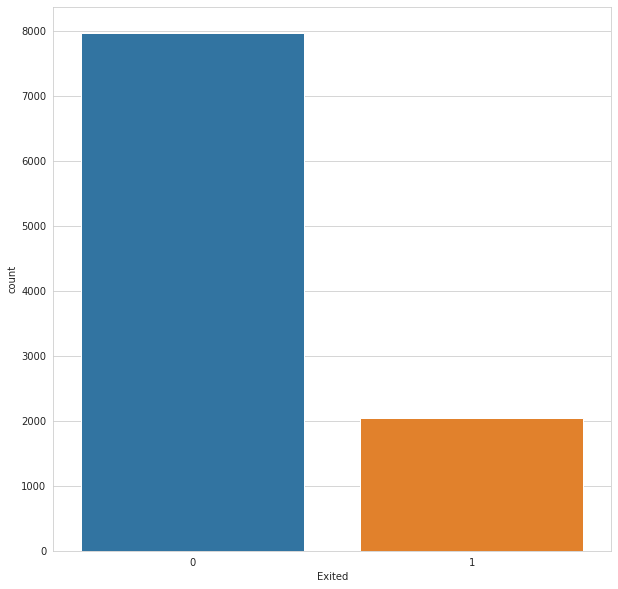

In [13]:
plt.figure(figsize=(10,10))
sns.countplot(df["Exited"])

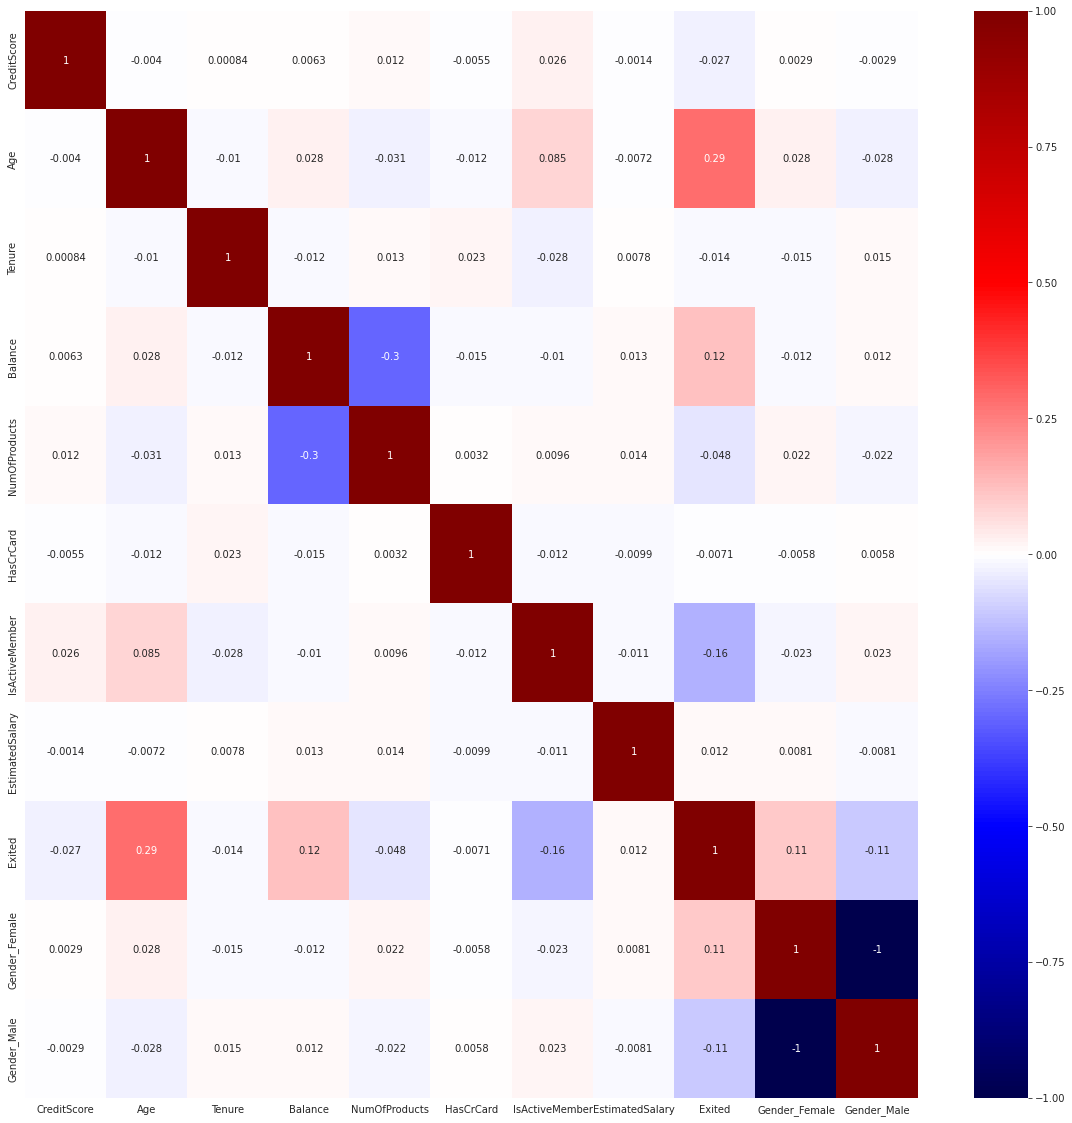

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="seismic"); 

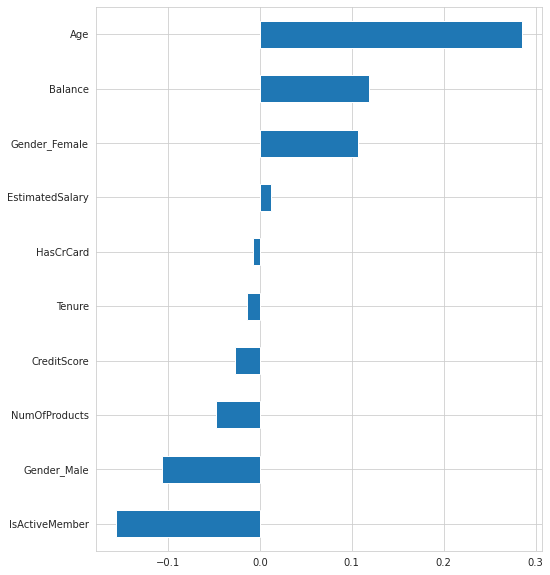

In [15]:
plt.figure(figsize = (8,10))
df.corr()['Exited'].sort_values().drop("Exited").plot(kind = "barh");  

# Preprocessing of Data
- Train | Test Split, Scalling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [17]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [18]:
seed = 42

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.15, random_state = seed)

In [20]:
scaler = MinMaxScaler()

In [21]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV  

In [23]:
X_train.shape

(8500, 10)

In [24]:
X_test.shape

(1500, 10)

In [25]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))         
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])  

In [26]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 100, epochs = 300, verbose=1)  

Epoch 1/300
73/73 [==============================] - 4s 18ms/step - loss: 0.6362 - recall: 0.1286 - val_loss: 0.5466 - val_recall: 0.0000e+00
Epoch 2/300
73/73 [==============================] - 0s 6ms/step - loss: 0.5173 - recall: 0.0000e+00 - val_loss: 0.4980 - val_recall: 0.0000e+00
Epoch 3/300
73/73 [==============================] - 0s 7ms/step - loss: 0.4991 - recall: 0.0000e+00 - val_loss: 0.4873 - val_recall: 0.0000e+00
Epoch 4/300
73/73 [==============================] - 1s 7ms/step - loss: 0.4856 - recall: 0.0000e+00 - val_loss: 0.4736 - val_recall: 0.0000e+00
Epoch 5/300
73/73 [==============================] - 0s 5ms/step - loss: 0.4680 - recall: 0.0068 - val_loss: 0.4590 - val_recall: 0.0354
Epoch 6/300
73/73 [==============================] - 0s 5ms/step - loss: 0.4514 - recall: 0.0650 - val_loss: 0.4470 - val_recall: 0.1063
Epoch 7/300
73/73 [==============================] - 0s 5ms/step - loss: 0.4371 - recall: 0.1300 - val_loss: 0.4349 - val_recall: 0.1299
Epoch 8/300


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [28]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.636,0.129,0.547,0.000
1,0.517,0.000,0.498,0.000
2,0.499,0.000,0.487,0.000
3,0.486,0.000,0.474,0.000
4,0.468,0.007,0.459,0.035


<Figure size 720x720 with 0 Axes>

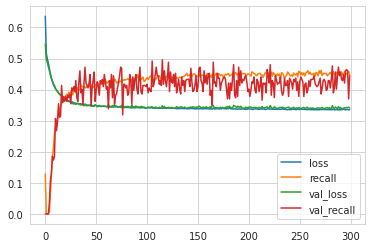

In [29]:
plt.figure(figsize = (10,10))
loss_df.plot();    

In [30]:
model.evaluate(X_test, y_test, verbose=0)   

[0.36179348826408386, 0.46405228972435]

In [31]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.36179348826408386
accuracy :  0.46405228972435


In [32]:
y_pred = model.predict(X_test) > 0.5                  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))          

[[1130   64]
 [ 164  142]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1194
           1       0.69      0.46      0.55       306

    accuracy                           0.85      1500
   macro avg       0.78      0.71      0.73      1500
weighted avg       0.84      0.85      0.84      1500



In [33]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score


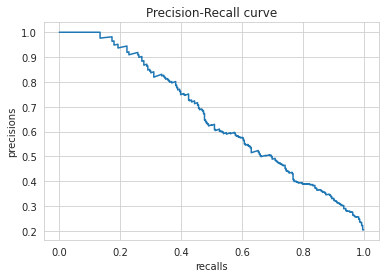

In [34]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [35]:
average_precision_score(y_test, y_pred_proba)

0.6602276682322877

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [37]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid")) 
opt = Adam(lr = 0.001)        
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])  

In [38]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced", classes=np.unique(y_train), y = y_train)

class_weights = {0:class_weights[0], 1:class_weights[1]}
class_weights

{0: 0.6278623134879598, 1: 2.455228191796649}

In [39]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 100, epochs = 200, verbose=1, class_weight = class_weights)  

Epoch 1/200
73/73 [==============================] - 2s 6ms/step - loss: 0.6855 - recall: 0.9113 - val_loss: 0.7131 - val_recall: 0.8386
Epoch 2/200
73/73 [==============================] - 0s 2ms/step - loss: 0.6712 - recall: 0.7989 - val_loss: 0.6951 - val_recall: 0.7717
Epoch 3/200
73/73 [==============================] - 0s 2ms/step - loss: 0.6450 - recall: 0.7068 - val_loss: 0.6463 - val_recall: 0.6614
Epoch 4/200
73/73 [==============================] - 0s 2ms/step - loss: 0.6122 - recall: 0.6737 - val_loss: 0.6288 - val_recall: 0.6772
Epoch 5/200
73/73 [==============================] - 0s 3ms/step - loss: 0.5855 - recall: 0.7055 - val_loss: 0.5857 - val_recall: 0.6614
Epoch 6/200
73/73 [==============================] - 0s 2ms/step - loss: 0.5683 - recall: 0.7116 - val_loss: 0.5992 - val_recall: 0.7087
Epoch 7/200
73/73 [==============================] - 0s 2ms/step - loss: 0.5554 - recall: 0.7244 - val_loss: 0.5595 - val_recall: 0.6890
Epoch 8/200
73/73 [======================

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [41]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.686,0.911,0.713,0.839
1,0.671,0.799,0.695,0.772
2,0.645,0.707,0.646,0.661
3,0.612,0.674,0.629,0.677
4,0.586,0.705,0.586,0.661


<Figure size 720x720 with 0 Axes>

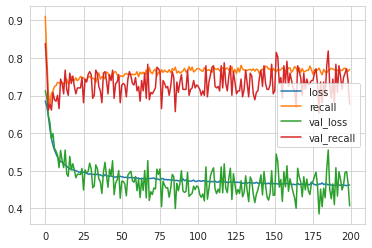

In [42]:
plt.figure(figsize=(10,10))
loss_df.plot();    

In [43]:
model.evaluate(X_test, y_test, verbose=0)   

[0.4247387647628784, 0.673202633857727]

In [44]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4247387647628784
accuracy :  0.673202633857727


In [45]:
y_pred = model.predict(X_test) > 0.5                  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))          

[[980 214]
 [100 206]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1194
           1       0.49      0.67      0.57       306

    accuracy                           0.79      1500
   macro avg       0.70      0.75      0.71      1500
weighted avg       0.82      0.79      0.80      1500



In [46]:
from sklearn.metrics import precision_recall_curve

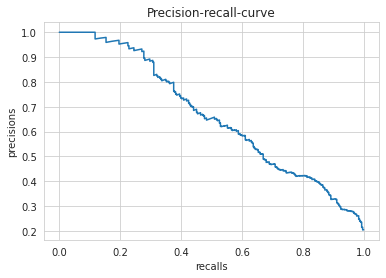

In [47]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)         
plt.plot(recalls,precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-recall-curve')
plt.show()

In [48]:
roc_auc_score(y_test, y_pred_proba)

0.8443360593818766

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [49]:
from tensorflow.keras.optimizers import Adam              

In [50]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.002)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [51]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 10, restore_best_weights = True)

In [52]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 100, epochs = 200, verbose = 1,
          callbacks = [early_stop])

Epoch 1/200
73/73 [==============================] - 1s 4ms/step - loss: 0.5804 - accuracy: 0.7596 - val_loss: 0.5010 - val_accuracy: 0.8008
Epoch 2/200
73/73 [==============================] - 0s 2ms/step - loss: 0.4964 - accuracy: 0.7956 - val_loss: 0.4793 - val_accuracy: 0.8008
Epoch 3/200
73/73 [==============================] - 0s 2ms/step - loss: 0.4721 - accuracy: 0.7957 - val_loss: 0.4571 - val_accuracy: 0.8039
Epoch 4/200
73/73 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8089 - val_loss: 0.4378 - val_accuracy: 0.8173
Epoch 5/200
73/73 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.8140 - val_loss: 0.4194 - val_accuracy: 0.8141
Epoch 6/200
73/73 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8239 - val_loss: 0.4057 - val_accuracy: 0.8275
Epoch 7/200
73/73 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8274 - val_loss: 0.3931 - val_accuracy: 0.8369
Epoch 8/200
7

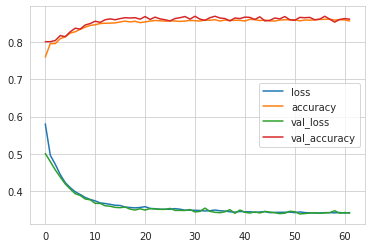

In [53]:
loss_df = pd.DataFrame(model.history.history)             ## dalgalar arttı, DL rasgelleiği yani stokastik olduğu için aynı ççalışmaların sonucu farklı olabiliyor
loss_df.plot()

In [54]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3548349142074585
accuracy :  0.8513333201408386


In [55]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1150   44]
 [ 179  127]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1194
           1       0.74      0.42      0.53       306

    accuracy                           0.85      1500
   macro avg       0.80      0.69      0.72      1500
weighted avg       0.84      0.85      0.83      1500



### Add Dropout Layer

In [56]:
from tensorflow.keras.layers import Dense, Activation, Dropout 
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation="relu", input_dim = X_train.shape[1]))
model.add(Dropout(0.5))

model.add(Dense(10, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(5, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["accuracy"])

In [58]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 100, epochs = 200, verbose = 1)

Epoch 1/200
73/73 [==============================] - 1s 5ms/step - loss: 0.6635 - accuracy: 0.6882 - val_loss: 0.6029 - val_accuracy: 0.8008
Epoch 2/200
73/73 [==============================] - 0s 2ms/step - loss: 0.5997 - accuracy: 0.7827 - val_loss: 0.5514 - val_accuracy: 0.8008
Epoch 3/200
73/73 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7924 - val_loss: 0.5338 - val_accuracy: 0.8008
Epoch 4/200
73/73 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7956 - val_loss: 0.5157 - val_accuracy: 0.8008
Epoch 5/200
73/73 [==============================] - 0s 2ms/step - loss: 0.5573 - accuracy: 0.7954 - val_loss: 0.5096 - val_accuracy: 0.8008
Epoch 6/200
73/73 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7956 - val_loss: 0.4996 - val_accuracy: 0.8008
Epoch 7/200
73/73 [==============================] - 0s 2ms/step - loss: 0.5354 - accuracy: 0.7956 - val_loss: 0.4959 - val_accuracy: 0.8008
Epoch 8/200
7

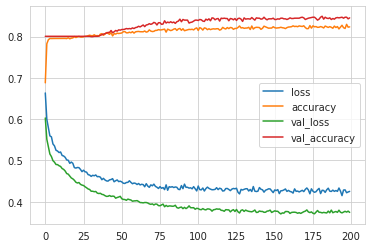

In [59]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [60]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3770880401134491
accuracy :  0.8399999737739563


In [61]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1179   15]
 [ 225   81]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1194
           1       0.84      0.26      0.40       306

    accuracy                           0.84      1500
   macro avg       0.84      0.63      0.66      1500
weighted avg       0.84      0.84      0.80      1500



### Add Early Stop

In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(20, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(10, activation = "relu"))
model.add(Dense(5, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])  

In [64]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 15, patience = 10, restore_best_weights = True) 

In [65]:
model.fit(x = X_train, y = y_train, validation_split = 0.15, batch_size = 100, epochs = 300, verbose = 1,  
          callbacks = [early_stop])

Epoch 1/300
73/73 [==============================] - 1s 7ms/step - loss: 0.6362 - accuracy: 0.7269 - val_loss: 0.5466 - val_accuracy: 0.8008
Epoch 2/300
73/73 [==============================] - 0s 4ms/step - loss: 0.5173 - accuracy: 0.7956 - val_loss: 0.4980 - val_accuracy: 0.8008
Epoch 3/300
73/73 [==============================] - 0s 4ms/step - loss: 0.4991 - accuracy: 0.7956 - val_loss: 0.4873 - val_accuracy: 0.8008
Epoch 4/300
73/73 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.7956 - val_loss: 0.4736 - val_accuracy: 0.8008
Epoch 5/300
73/73 [==============================] - 0s 3ms/step - loss: 0.4680 - accuracy: 0.7965 - val_loss: 0.4590 - val_accuracy: 0.8078
Epoch 6/300
73/73 [==============================] - 0s 4ms/step - loss: 0.4514 - accuracy: 0.8036 - val_loss: 0.4470 - val_accuracy: 0.8102
Epoch 7/300
73/73 [==============================] - 0s 4ms/step - loss: 0.4371 - accuracy: 0.8125 - val_loss: 0.4349 - val_accuracy: 0.8157
Epoch 8/300
7

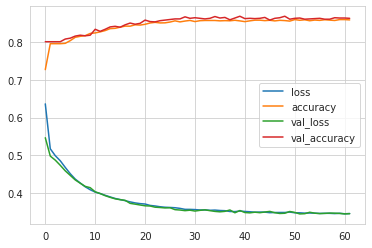

In [66]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();                                               

In [67]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)                                             

loss :  0.35988152027130127
accuracy :  0.8453333377838135


In [68]:
y_pred = model.predict(X_test) > 0.5
#y_pred = model.predict_classes(X_test) for tf 2.5.0
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))           

[[1140   54]
 [ 178  128]]
              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1194
           1       0.70      0.42      0.52       306

    accuracy                           0.85      1500
   macro avg       0.78      0.69      0.72      1500
weighted avg       0.83      0.85      0.83      1500



#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

In [69]:
import pickle # to save the model or scalling parameters

pickle.dump(scaler, open("scaler_churn", 'wb')) # to save the scaler

In [70]:
tf.random.set_seed(42)
model = Sequential()

model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(5, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer=Adam(learning_rate=0.003),
              loss="binary_crossentropy",
              metrics=["Recall"])

model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test),
          callbacks=[early_stop],
          batch_size=100,
          epochs=200,
          verbose=1,
          class_weight=class_weights)

Epoch 1/200
85/85 [==============================] - 1s 5ms/step - loss: 0.6693 - recall: 0.8030 - val_loss: 0.6986 - val_recall: 0.8007
Epoch 2/200
85/85 [==============================] - 0s 2ms/step - loss: 0.6003 - recall: 0.6805 - val_loss: 0.6169 - val_recall: 0.7516
Epoch 3/200
85/85 [==============================] - 0s 2ms/step - loss: 0.5530 - recall: 0.7129 - val_loss: 0.6140 - val_recall: 0.7778
Epoch 4/200
85/85 [==============================] - 0s 2ms/step - loss: 0.5288 - recall: 0.7296 - val_loss: 0.5226 - val_recall: 0.7288
Epoch 5/200
85/85 [==============================] - 0s 2ms/step - loss: 0.5213 - recall: 0.7279 - val_loss: 0.5038 - val_recall: 0.7124
Epoch 6/200
85/85 [==============================] - 0s 2ms/step - loss: 0.5087 - recall: 0.7308 - val_loss: 0.4776 - val_recall: 0.6961
Epoch 7/200
85/85 [==============================] - 0s 2ms/step - loss: 0.5041 - recall: 0.7273 - val_loss: 0.5272 - val_recall: 0.7647
Epoch 8/200
85/85 [======================

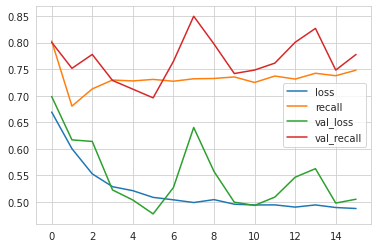

In [71]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [72]:
y_pred = (model.predict(X_test) > .5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[951 243]
 [ 93 213]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1194
           1       0.47      0.70      0.56       306

    accuracy                           0.78      1500
   macro avg       0.69      0.75      0.70      1500
weighted avg       0.82      0.78      0.79      1500



In [73]:
model.save('model_churn.h5')

## Prediction

In [74]:
single_customer = df.drop('Exited', axis=1).iloc[0]
single_customer

CreditScore          619.000
Age                   42.000
Tenure                 2.000
Balance                0.000
NumOfProducts          1.000
HasCrCard              1.000
IsActiveMember         1.000
EstimatedSalary   101348.880
Gender_Female          1.000
Gender_Male            0.000
Name: 0, dtype: float64

In [75]:
single_customer1 = single_customer.copy()
single_customer1["Age"] = 40
single_customer1["Balance"] = 50000

In [76]:
single_customer.values

array([6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05,
       1.0000000e+00, 0.0000000e+00])

In [77]:
single_customer = scaler.transform(single_customer.values.reshape(-1, 10))
single_customer

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ]])

In [78]:
single_customer1 = scaler.transform(single_customer1.values.reshape(-1, 10))
single_customer1

array([[0.538     , 0.2972973 , 0.2       , 0.20974249, 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ]])

In [79]:
model.predict(single_customer)

array([[0.42644274]], dtype=float32)

In [80]:
df["Exited"].iloc[0]

1

In [81]:
model.predict(single_customer1) 

array([[0.41640523]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___